In [2]:
import cv2
import matplotlib.pyplot as plt

from os import listdir, path, makedirs
from os.path import isfile, join

import shutil
import numpy as np

from sklearn.metrics import accuracy_score

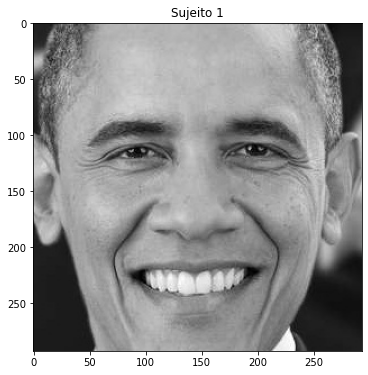

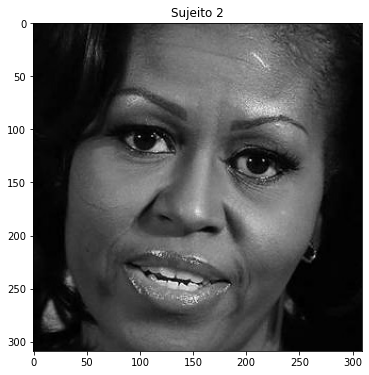

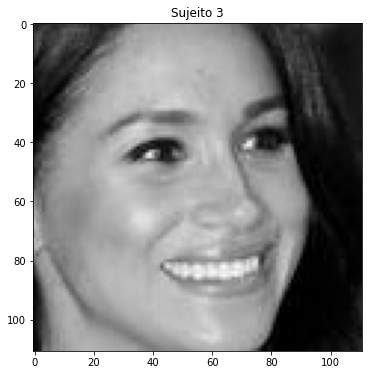

In [4]:
# Importar e verificar exemplos do dataset
# As imagens devem ser passadas do BGR para o RGB para visualização consiedernado que o método imread lê em BGR
imagem_face_1 = cv2.imread("/home/maju/FaceRecognition/Todos/s01_03.jpg")
imagem_face_1 = cv2.cvtColor(imagem_face_1, cv2.COLOR_BGR2RGB)

imagem_face_2 = cv2.imread("/home/maju/FaceRecognition/Todos/s02_09.jpg")
imagem_face_2 = cv2.cvtColor(imagem_face_2, cv2.COLOR_BGR2RGB)

imagem_face_3 = cv2.imread("/home/maju/FaceRecognition/Todos/s03_07.jpg")
imagem_face_3 = cv2.cvtColor(imagem_face_3, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,10))
plt.subplot(131)
plt.title("Sujeito 1")
plt.imshow(imagem_face_1)

plt.figure(figsize=(20,10))
plt.subplot(132)
plt.title("Sujeito 2")
plt.imshow(imagem_face_2)

plt.figure(figsize=(20,10))
plt.subplot(133)
plt.title("Sujeito 3")
plt.imshow(imagem_face_3)

plt.show()

In [5]:
# Verificar o tamanho das imagens
imagem_face_1.shape

(293, 293, 3)

In [7]:
# Tamanhos diferentes indicam que é necessário padronizar
imagem_face_3.shape

(111, 111, 3)

In [13]:
# Colocar as imagens em um array
faces_caminho = "/home/maju/FaceRecognition/Todos/"
lista_arq_faces = [f for f in listdir(faces_caminho) if isfile(join(faces_caminho, f))]

In [14]:
# Verificar se o array foi preenchido da forma que esperávamos
lista_arq_faces[0]

's02_11.jpg'

In [15]:
# Dividir as imagens em pastas de treino e pasta de teste
faces_path_treino = "/home/maju/FaceRecognition/Todos/treino/"
faces_path_teste = "/home/maju/FaceRecognition/Todos/teste/"

if not path.exists(faces_path_treino):
    makedirs(faces_path_treino)

if not path.exists(faces_path_teste):
    makedirs(faces_path_teste)

for arq in lista_arq_faces:
    sujeito = arq[1:3]
    numero = arq[4:6]
    
    if int(numero) <= 10:
       shutil.copyfile(faces_caminho + arq, faces_path_treino + arq)
    else:
       shutil.copyfile(faces_caminho + arq, faces_path_teste + arq)

In [16]:
# Função para padronizar as imagens em tamanho e cor
def padronizar_imagem(imagem_caminho):
    imagem = cv2.imread(imagem_caminho, cv2.IMREAD_GRAYSCALE)
    imagem = cv2.resize(imagem, (200, 200), interpolation=cv2.INTER_LANCZOS4)
    return imagem

In [17]:
# Dividir as imagens de treino e teste em 2 listas
lista_faces_treino = [f for f in listdir(faces_path_treino) if isfile(join(faces_path_treino, f))]
lista_faces_teste = [f for f in listdir(faces_path_teste) if isfile(join(faces_path_teste, f))]

In [18]:
# Verificar as listas
lista_faces_treino[0]

's02_03.jpg'

In [19]:
lista_faces_teste[0]

's02_11.jpg'

In [20]:
# Criar dois arrays, um para os dados já padronizados de treinamento e outro para os nomes dos sujeitos
dados_treinamento, sujeitos = [], []

In [21]:
# Padronizar e armazenar a imagem de treino
for i, arq in enumerate(lista_faces_treino):
    imagem_path = faces_path_treino + arq
    imagem = padronizar_imagem(imagem_path)
    dados_treinamento.append(imagem)
    sujeito = arq[1:3]
    sujeitos.append(int(sujeito))

In [22]:
# Verificar o tamanho dos dados 
len(dados_treinamento)

30

In [23]:
# Verificar a quantidade de nomes (o sujeito[0] é o nome do sujeito da foto dados_treinamento[0] 
# e assim por diante)
len(sujeitos)

30

In [24]:
## Padronizar e armazenar a imagem de teste
dados_teste, sujeitos_teste = [], []

for i, arq in enumerate(lista_faces_teste):
    imagem_path = faces_path_teste + arq
    imagem = padronizar_imagem(imagem_path)
    dados_teste.append(imagem)
    sujeito = arq[1:3]
    sujeitos_teste.append(int(sujeito))

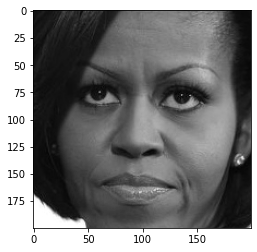

In [25]:
# Verificar o dado
plt.imshow(dados_teste[0], cmap='gray')

In [26]:
# Transformar os nomes em um array de int para ser comparado
sujeitos = np.asarray(sujeitos, dtype=np.int32)
sujeitos_teste = np.asarray(sujeitos_teste, dtype=np.int32)

In [27]:
# Criar o modelo
modelo_eingenfaces = cv2.face.EigenFaceRecognizer_create()

In [28]:
# Treinar o modelo
modelo_eingenfaces.train(dados_treinamento, sujeitos)

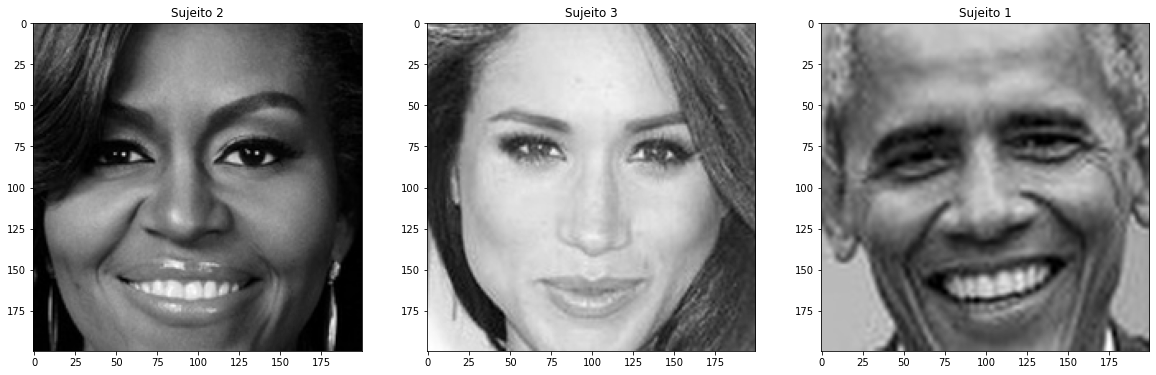

In [29]:
# Testar o modelo, mostrar a imagem que será apresentada para o modelo e seus respectivos nomes (Sujeito 1, 2 ou 3)
plt.figure(figsize=(20,10))

plt.subplot(131)
plt.title("Sujeito "+str(sujeitos_teste[6]))
plt.imshow(dados_teste[6], cmap='gray')

plt.subplot(132)
plt.title("Sujeito "+str(sujeitos_teste[7]))
plt.imshow(dados_teste[7], cmap='gray')

plt.subplot(133)
plt.title("Sujeito "+str(sujeitos_teste[13]))
plt.imshow(dados_teste[13], cmap='gray')

plt.show()

In [30]:
# Criar uma lista de nomes reais para ser comparado com os números dos sujeitos
nomes_sujeitos = ['Obama', 'Michelle', 'Meghan']

# Função para imprimir a imagem e a predição do modelo
def imprimir_predicao(predicao, imagem):
    plt.title(nomes_sujeitos[predicao[0]-1])
    plt.imshow(imagem, cmap='gray')

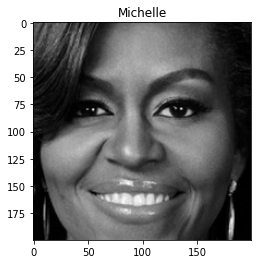

In [31]:
# Testar o modelo com a primeira imagem, acertou
predicao = modelo_eingenfaces.predict(dados_teste[6])

imprimir_predicao(predicao, dados_teste[6])

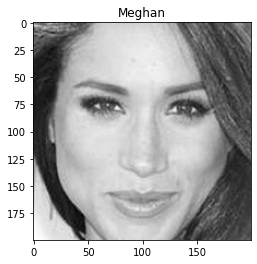

In [32]:
# Testar o modelo com a segunda imagem, acertou
predicao = modelo_eingenfaces.predict(dados_teste[7])

imprimir_predicao(predicao, dados_teste[7])

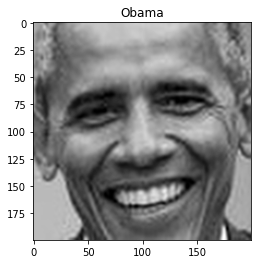

In [33]:
# Testar o modelo com a terceira imagem, acertou
predicao = modelo_eingenfaces.predict(dados_teste[13])

imprimir_predicao(predicao, dados_teste[13])

In [34]:
# Lista para as predições do modelo
y_pred_eingenfaces = []

In [36]:
# Testar todos os dados disponíveis para teste
for item in dados_teste:
    y_pred_eingenfaces.append(modelo_eingenfaces.predict(item)[0])

In [37]:
# Verificar e imprimir a acurácia
acuracia_eingenfaces = accuracy_score(sujeitos_teste, y_pred_eingenfaces)

In [38]:
# O modelo acerta em cerca de 79% das vezes, apesar do dataset limitado
acuracia_eingenfaces

0.7857142857142857